In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nistats
import json
import numpy as np

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
with open('config.json', 'r') as fo:
    d = json.load(fo)


In [91]:
import pandas as pd

n_secs = 450
tr = 1.5
frame_times = np.linspace(0, n_secs, int(n_secs / tr) + 1)


def plot_task(d, task):
    for sub in d.keys():
        for ses in d[sub].keys():
            dat = d[sub][ses][task]

            onsets = np.cumsum(np.array(dat['durations']) + np.array(dat['itis']))
            onsets = np.hstack((np.array([0]), onsets[:-1]))
            dat['onsets'] = onsets + 6.
            df = pd.DataFrame.from_dict(dat)
            
            fig, ax = plt.subplots(figsize=(16, 4))

            all_signals = []
            for ttype in df['trial_types'].unique():
                ttype_df = df.loc[df['trial_types'] == ttype]
                od = ttype_df[['onsets', 'durations']].values
                oda = np.hstack((od, np.ones((od.shape[0], 1)))).T
                signal, name = hemodynamic_models.compute_regressor(
                    oda, 'spm', frame_times, con_id=ttype,
                    oversampling=16)
                signal = np.squeeze(signal)
                ax.plot(frame_times, signal, label=name[0])
                all_signals.append(signal)

            leg = ax.legend()
            ax.set_title('Sub {0} Session {1} {2} task'.format(sub, ses, task))
            ax.set_xlim((0, n_secs))
            fig.show()
            idx = np.triu_indices(len(all_signals), 1)
            print(np.corrcoef(np.vstack(all_signals))[idx])

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


[-0.27889305 -0.2664062  -0.26334571]
[-0.30617216 -0.29652109 -0.26787522]
[-0.28766067 -0.28606339 -0.291987  ]


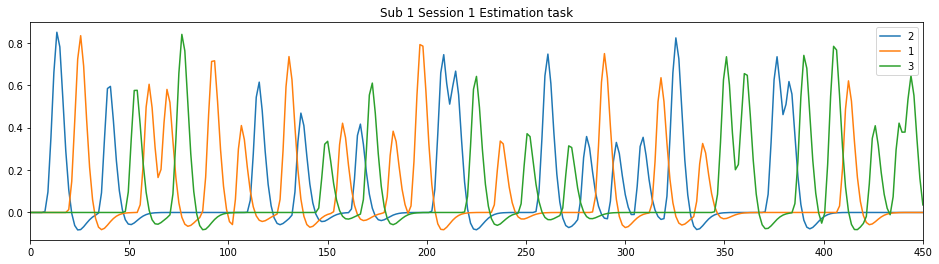

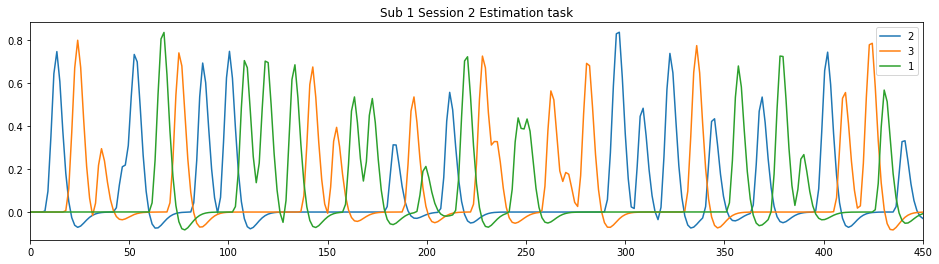

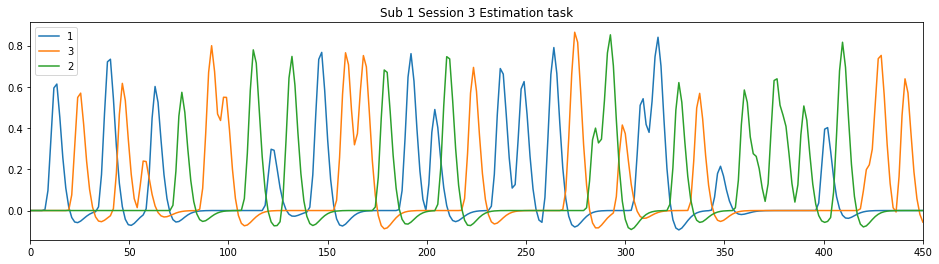

In [93]:
task = 'Estimation'
plot_task(d, task)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


[-0.26584421 -0.26064454 -0.26878296]
[-0.28196259 -0.28014488 -0.28308642]
[-0.26086834 -0.2504819  -0.26139159]


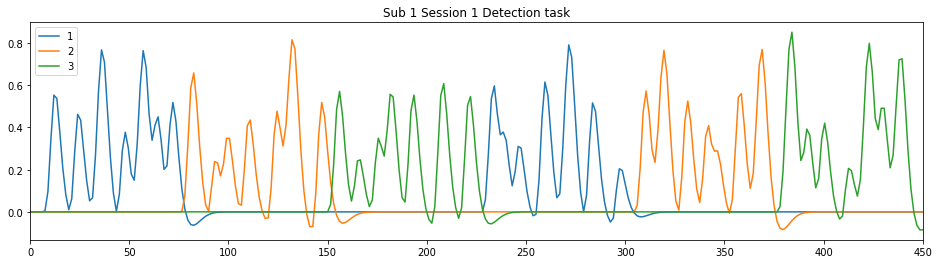

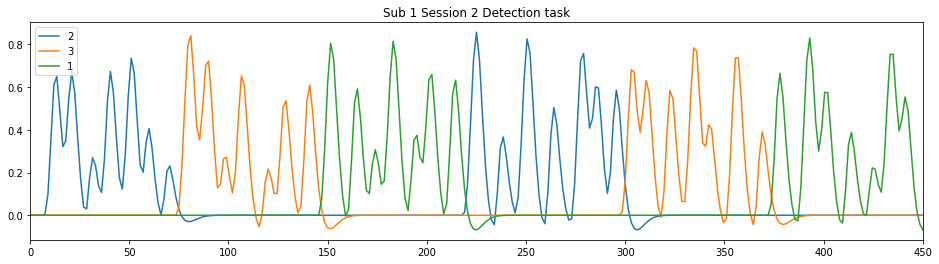

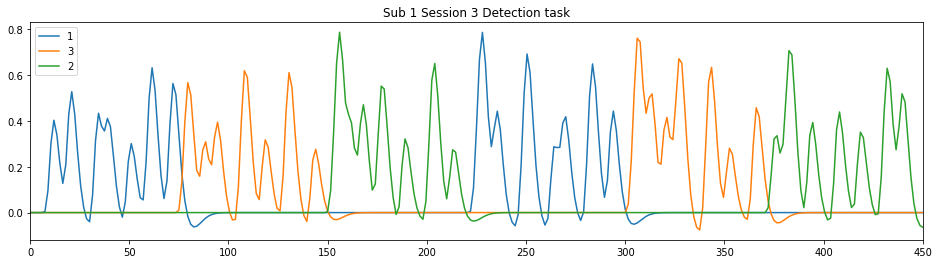

In [94]:
task = 'Detection'
plot_task(d, task)